In [2]:
import pandas as pd


### 🌦️ Weather Features Table

| feature | meaning | values | formula |
|:--|:--|:--|:--|
| datetime | Observation date | Format YYYY-MM-DD (daily) |  |
| tempmax | Maximum daily temperature | °C | Max(temp) |
| tempmin | Minimum daily temperature | °C | Min(temp) |
| temp | Average daily temperature | °C | (tempmax + tempmin) / 2 |
| feelslikemax | Maximum daily feels-like temperature | °C | Calculated using Heat Index (combination of temperature and humidity) |
| feelslikemin | Minimum daily feels-like temperature | °C | Calculated using Wind Chill (combination of temperature and wind speed) |
| feelslike | Average daily feels-like temperature | °C | Heat Index (hot and humid) or Wind Chill (cold, windy) |
| dew | The dew point is the temperature at which air must be cooled to become saturated with moisture and start forming dew | °C |  |
| humidity | Daily values of humidity are the mean of the hourly values (average humidity) | 0–100 (%) | Daily values of humidity are the mean of the hourly values |
| precip | Daily precipitation amount | mm | Sum of hourly precipitation values measured in the day |
| precipprob | Probability of precipitation | 0–100 (%) | Forecasted probability of precipitation |
| precipcover | Percentage of time with precipitation in the day | 0–100 (%) | (Number of hours with precipitation / 24) × 100 |
| preciptype | Type of precipitation | rain, snow, ice, freezing rain |  |
| snow | The amount of new snow that has fallen in the time period | cm |  |
| snowdepth | The average amount of snow currently on the ground for the time period | cm |  |
| windgust | The maximum wind speed measured over a short period of time (typically less than 20 seconds) | km/h or mph | Max(wind speed) |
| windspeed | Average wind speed | km/h | Average wind speed during the day |
| winddir | Wind direction | 0–360° (0 degrees = North, 90 = East, 180 = South, 270 = West, back to 360 = North) |  |
| pressure | The atmospheric pressure at sea level (removes reduction in pressure due to altitude). Also called Sea Level Pressure | mb | Daily values of sea level pressure are the mean of the hourly values |
| cloudcover | The amount of sky that is covered by cloud (cloud cover) | 0–100 (%) | Daily values include the mean of the hourly cloud coverage values |
| visibility | The distance that can be seen in daylight (visibility) | km | Daily values are created from the mean of the hourly values |
| solarradiation | Solar radiation | W/m² | Daily values of solar radiation are the mean of the hourly values |
| solarenergy | Solar energy during the day | MJ/m² | Daily values of solar energy are the sum of the hourly values |
| uvindex | UV index | 0–10 | The UV index is calculated based on short-wave solar radiation, cloudiness, cloud type, time of day, time of year, and altitude. Daily values represent the maximum of hourly values |
| severerisk | The risk of convective storms such as thunderstorms, hail, and tornadoes | 0–100 | Low Risk: Values less than 30 indicate a low likelihood of severe weather events; Moderate Risk: Values between 30 and 70 suggest a moderate probability of severe weather activity; High Risk: Values above 70 denote a high potential for severe weather, requiring caution and preparedness |
| sunrise | Sunrise time | HH:MM:SS |  |
| sunset | Sunset time | HH:MM:SS |  |
| moonphase | Moon phase | 0–1 | 0 – new moon, 0–0.25 – waxing crescent, 0.25 – first quarter, 0.25–0.5 – waxing gibbous, 0.5 – full moon, 0.5–0.75 – waning gibbous, 0.75 – last quarter, 0.75–1 – waning crescent |
| conditions | Notable weather conditions reported at a particular location (general weather conditions) | thunderstorms, rainfall, etc. |  |
| description | Description of the weather for the day | Text description from API |  |
| icon | A weather icon | clear-day, clear-night, rain, snow, etc. |  |
| stations | Weather station code | VVNB |  |
| source | Data source | obs |  |
| name | Station or geographical location name of where the data was recorded | Hanoi |  |

✅ **Total features:** 34


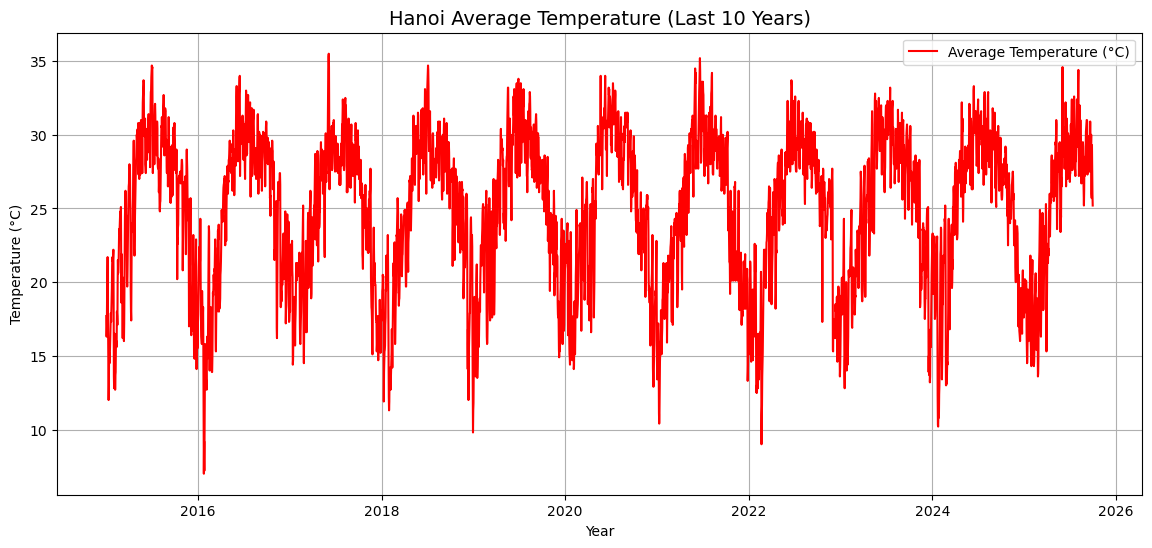

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu thời tiết
df = pd.read_csv("D:\ML PRO\machine_learning_lab\dataset\merged_hn.csv", parse_dates=["datetime"])

# Sắp xếp theo thời gian
df = df.sort_values("datetime")

# Vẽ line chart nhiệt độ trung bình
plt.figure(figsize=(14,6))
plt.plot(df["datetime"], df["temp"], label="Average Temperature (°C)", color="red")

plt.title("Hanoi Average Temperature (Last 10 Years)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Observation on Hanoi Temperature (2015–2025)

Based on the line chart of daily average temperature in Hanoi over the past ten years, several observations can be made:

1. **Seasonal Pattern**

   * The temperature shows a clear seasonal cycle, with high peaks during summer (often above 30°C) and low values during winter (sometimes close to 10°C).
   * This cyclical fluctuation repeats consistently each year.

2. **No Significant Long-Term Trend**

   * There is no obvious upward or downward trend in the overall temperature pattern.
   * The average levels appear relatively stable across the 10-year period.

3. **High Variability**

   * Temperature varies strongly within each year, reflecting the sharp contrast between Hanoi’s hot summers and cool winters.
   * The “wave-like” pattern highlights the distinct seasonal climate of the region.

4. **Extreme Events**

   * A few outliers are present, representing unusual cold waves or heatwaves.
   * These events indicate that while the general cycle is stable, extreme weather conditions have occurred occasionally.

**Conclusion:**
The average temperature in Hanoi during the last decade demonstrates a stable long-term trend with strong seasonal variation. Although the annual cycle is consistent, some extreme temperature events occurred, reflecting the growing unpredictability of short-term climate phenomena.


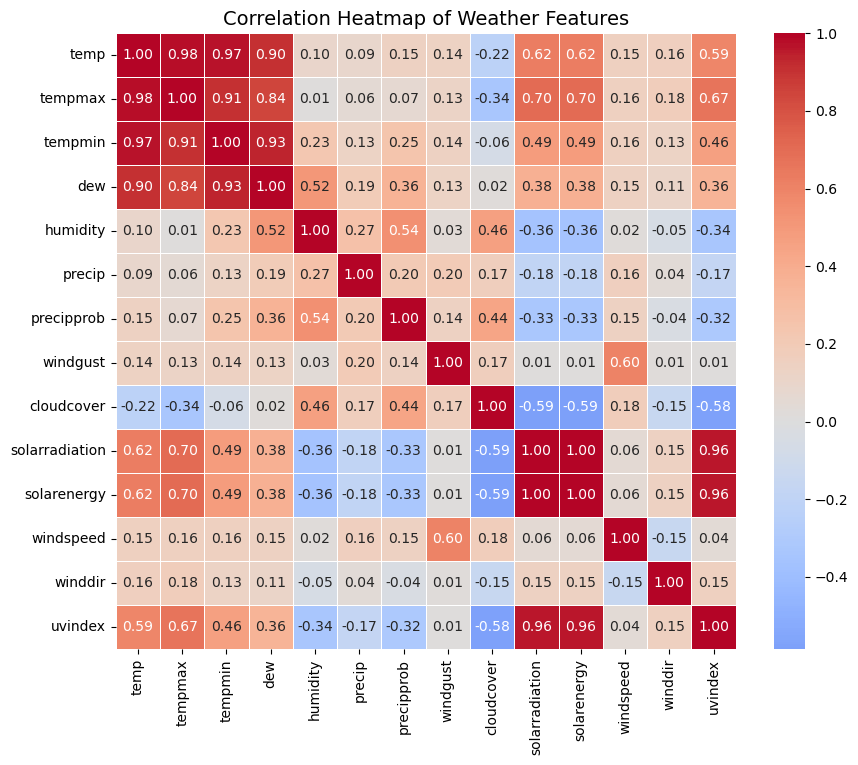

=== Correlation of features with 'temp' ===
- tempmax: positively correlated with temp (r = 0.98)
- tempmin: positively correlated with temp (r = 0.97)
- dew: positively correlated with temp (r = 0.90)
- solarradiation: positively correlated with temp (r = 0.62)
- solarenergy: positively correlated with temp (r = 0.62)
- uvindex: positively correlated with temp (r = 0.59)
- winddir: positively correlated with temp (r = 0.16)
- windspeed: positively correlated with temp (r = 0.15)
- precipprob: positively correlated with temp (r = 0.15)
- windgust: positively correlated with temp (r = 0.14)
- humidity: positively correlated with temp (r = 0.10)
- precip: positively correlated with temp (r = 0.09)
- cloudcover: negatively correlated with temp (r = -0.22)

Top positively correlated features with 'temp':
tempmax    0.977702
tempmin    0.969585
dew        0.902917
Name: temp, dtype: float64

Top negatively correlated features with 'temp':
humidity      0.100446
precip        0.090313
cloudc

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu thời tiết
df = pd.read_csv("D:/ML PRO/machine_learning_lab/dataset/merged_hn.csv", parse_dates=["datetime"])

# Chọn các features quan trọng để phân tích correlation
features = ["temp", "tempmax", "tempmin", "dew", "humidity", "precip","precipprob","windgust","cloudcover","solarradiation","solarenergy", "windspeed","winddir", "pressure", "uvindex"]

selected_features = [col for col in features if col in df.columns]
df_corr = df[selected_features]

# Tính correlation matrix
corr_matrix = df_corr.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Weather Features", fontsize=14)
plt.show()

target = "temp"
correlations = corr_matrix[target].drop(target).sort_values(ascending=False)

print("=== Correlation of features with 'temp' ===")
for feature, corr in correlations.items():
    relation = "positively" if corr > 0 else "negatively"
    print(f"- {feature}: {relation} correlated with temp (r = {corr:.2f})")

print("\nTop positively correlated features with 'temp':")
print(correlations.head(3))

print("\nTop negatively correlated features with 'temp':")
print(correlations.tail(3))


### How Weather Features Combine to Detect Hanoi Temperature

The correlation analysis shows how different weather variables interact with temperature in Hanoi:

1. **Highly Positively Correlated Features**

   * **Tempmax**, **tempmin**, and **dew** have strong positive correlations with **temp**.
   * This means that when the daily maximum and minimum temperatures rise, the average temperature also increases.
   * Similarly, higher dew points indicate more moisture in the air, which usually accompanies warmer conditions.

2. **Negatively Correlated Features**

   * **Humidity** and **precipitation** tend to have negative correlations with **temp**.
   * This suggests that cooler days are often wetter or more humid, as clouds and rainfall limit sunlight and cooling dominates.

3. **Moderate Correlations**

   * **Windspeed** and **sealevelpressure** may show weaker correlations.
   * Wind can influence temperature indirectly by distributing heat, while pressure changes are often associated with shifts between warm and cold weather fronts.

4. **Combined Influence**

   * Together, these features help in predicting Hanoi’s temperature:

     * High **tempmax/tempmin** + high **dew** + low **humidity/precip** → **Hot day**.
     * Low **tempmax/tempmin** + low **dew** + high **humidity/precip** → **Cool day**.
   * In machine learning or statistical modeling, these relationships can be used to build predictive models for temperature forecasting.

**Conclusion:**
By combining correlated features like dew point, humidity, precipitation, and pressure with temperature extremes, we can better detect and estimate Hanoi’s temperature patterns. These interdependencies reflect the complex balance between heat, moisture, and atmospheric dynamics that define Hanoi’s climate.
